<a href="https://colab.research.google.com/github/jupiterthought/my-reposito/blob/main/Devika_Thilakan_Exit_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

.** Object:
 to analyze  each customer: their demographics,
the services they use, billing methods, payment history, and, most importantly,
whether they have already churned these factors and create a
predictive model that can identify customers likely to leave in the future and  help the company understand the reasons behind customer
departures and implement strategies to keep them from leaving**

In [4]:
data=pd.read_csv("/content/customer_churn.csv")

In [5]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0.0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0.0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0.0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1.0,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0.0,No,No,66.0,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [7]:
data.shape

(7043, 21)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7036 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7030 non-null   float64
 6   PhoneService      7030 non-null   object 
 7   MultipleLines     7030 non-null   object 
 8   InternetService   7006 non-null   object 
 9   OnlineSecurity    7028 non-null   object 
 10  OnlineBackup      7028 non-null   object 
 11  DeviceProtection  7028 non-null   object 
 12  TechSupport       7028 non-null   object 
 13  StreamingTV       7021 non-null   object 
 14  StreamingMovies   7029 non-null   object 
 15  Contract          7018 non-null   object 
 16  PaperlessBilling  7029 non-null   object 


In [9]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7036.000000,7030.000000,7027.000000
mean,0.162024,32.367568,64.757855
std,0.368499,24.560644,30.091845
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
data.nunique()

,0
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3



**Exploratory Data Anlysis
**

Univarite analysis

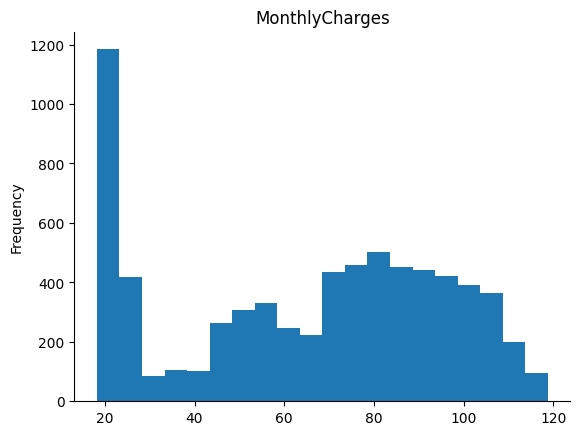

In [14]:
"MonthlyCharges"
data['MonthlyCharges'].plot(kind='hist', bins=20, title='MonthlyCharges')
plt.gca().spines[['top', 'right',]].set_visible(False)

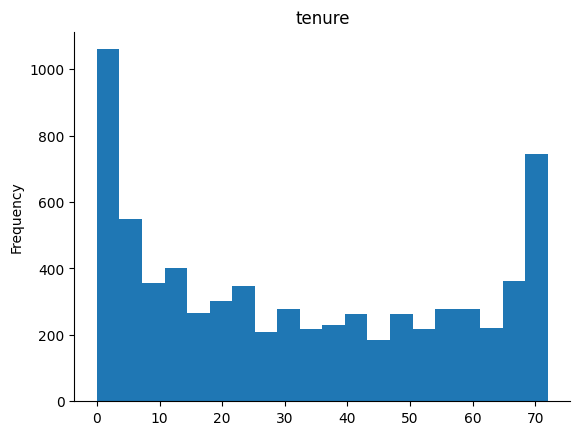

In [17]:
data['tenure'].plot(kind='hist', bins=20, title='tenure')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [18]:
# Bivariate analysis

Text(0, 0.5, 'MonthlyCharges')

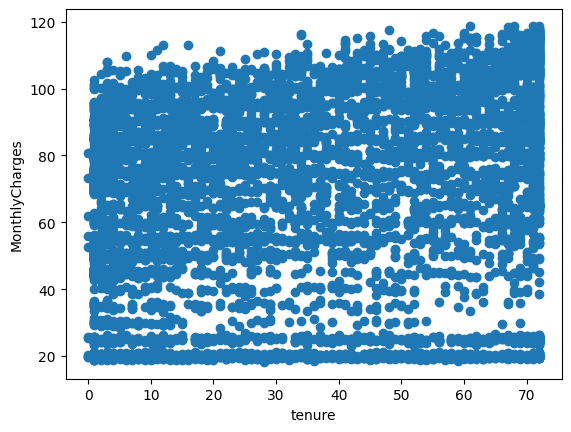

In [19]:
x=data['tenure']
y=data['MonthlyCharges']

plt.scatter(data['tenure'],data['MonthlyCharges'])
plt.xlabel('tenure')
plt.ylabel('MonthlyCharges')

In [22]:
#Data preprocessing:For accqurate prediction of model

In [24]:
#Data cleaning
data['gender'].value_counts()

,count
gender,
Male,3555
Female,3488


In [25]:
data['PaymentMethod'].value_counts()

,count
PaymentMethod,
Electronic check,2365
Mailed check,1611
Bank transfer (automatic),1544
Credit card (automatic),1522


In [26]:
data['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [27]:
data['PaperlessBilling'].value_counts()

,count
PaperlessBilling,
Yes,4165
No,2864


In [28]:
data['PhoneService'].value_counts()

,count
PhoneService,
Yes,6349
No,681


In [29]:
data['Partner'].value_counts()

,count
Partner,
No,3641
Yes,3402


In [31]:
data['InternetService'].value_counts()

,count
InternetService,
Fiber optic,3081
DSL,2407
No,1518


In [32]:
data['MultipleLines'].value_counts()

,count
MultipleLines,
No,3382
Yes,2967
No phone service,681


Remove No phone service from multiple lines

In [42]:
data['MultipleLines']=np.where(data['MultipleLines']=="No phone service",'No',data['MultipleLines'])
data['MultipleLines'].value_counts()

,count
MultipleLines,
No,4063
Yes,2967


In [33]:
data['OnlineSecurity'].value_counts()

,count
OnlineSecurity,
No,3492
Yes,2013
No internet service,1523


Remove No internet service from OnlineSecurity

In [43]:
data['OnlineSecurity']=np.where(data['OnlineSecurity']=="No internet service",'No',data['OnlineSecurity'])
data['OnlineSecurity'].value_counts()

,count
OnlineSecurity,
No,5015
Yes,2013


In [34]:
data['DeviceProtection'].value_counts()

,count
DeviceProtection,
No,3090
Yes,2415
No internet service,1523


To remove No internet service from DeviceProtection

In [45]:
data['DeviceProtection']=np.where(data['DeviceProtection']=="No internet service",'No',data['DeviceProtection'])
data['DeviceProtection'].value_counts()

,count
DeviceProtection,
No,4613
Yes,2415


To remove No internet service from TechSupport

In [35]:
data['TechSupport'].value_counts()

,count
TechSupport,
No,3466
Yes,2039
No internet service,1523


In [46]:
data['TechSupport']=np.where(data['TechSupport']=="No internet service",'No',data['TechSupport'])
data['TechSupport'].value_counts()

,count
TechSupport,
No,4989
Yes,2039


In [36]:
data['StreamingTV'].value_counts()

,count
StreamingTV,
No,2802
Yes,2699
No internet service,1520


To remove No internet service from StreamingTV

In [47]:
data['StreamingTV']=np.where(data['StreamingTV']=="No internet service",'No',data['StreamingTV'])
data['StreamingTV'].value_counts()

,count
StreamingTV,
No,4322
Yes,2699


In [37]:
data['StreamingMovies'].value_counts()

,count
StreamingMovies,
No,2780
Yes,2726
No internet service,1523


To remove No internet service from StreamingMovies

In [48]:
data['StreamingMovies']=np.where(data['StreamingMovies']=="No internet service",'No',data['StreamingMovies'])
data['StreamingMovies'].value_counts()

,count
StreamingMovies,
No,4303
Yes,2726


In [38]:
data['Contract'].value_counts()

,count
Contract,
Month-to-month,3860
Two year,1692
One year,1466


In [39]:
data['MonthlyCharges'].value_counts()

,count
MonthlyCharges,
20.05,61
19.85,45
19.90,44
19.95,44
19.65,43
...,...
23.65,1
114.70,1
43.65,1


In [40]:
data['TotalCharges'].value_counts()

,count
TotalCharges,
,11
20.2,11
19.75,9
19.9,8
19.65,8
...,...
6565.85,1
2117.2,1
203.95,1


In [41]:
data['Dependents'].value_counts()

,count
Dependents,
No,4933
Yes,2110


In [49]:
data.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,7
Partner,0
Dependents,0
tenure,13
PhoneService,13
MultipleLines,13
InternetService,37
OnlineSecurity,15


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7036 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7030 non-null   float64
 6   PhoneService      7030 non-null   object 
 7   MultipleLines     7030 non-null   object 
 8   InternetService   7006 non-null   object 
 9   OnlineSecurity    7028 non-null   object 
 10  OnlineBackup      7028 non-null   object 
 11  DeviceProtection  7028 non-null   object 
 12  TechSupport       7028 non-null   object 
 13  StreamingTV       7021 non-null   object 
 14  StreamingMovies   7029 non-null   object 
 15  Contract          7018 non-null   object 
 16  PaperlessBilling  7029 non-null   object 


Filling null values using meadian for SeniorCitizen, MonthlyCharges,tenure for numeric values


In [53]:
for i in ['SeniorCitizen','MonthlyCharges','tenure']:
  data[i]=data[i].fillna(data[i]).median()

In [54]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Filling null values using mode for 'PhoneService','MultipleLines','InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','TotalCharges' categorical values

In [60]:
data['PhoneService'] = data['PhoneService'].fillna(data['PhoneService'].mode().iloc[0])
data['MultipleLines'] = data['MultipleLines'].fillna(data['MultipleLines'].mode().iloc[0])
data['InternetService'] = data['InternetService'].fillna(data['InternetService'].mode().iloc[0])
data['OnlineSecurity'] = data['OnlineSecurity'].fillna(data['OnlineSecurity'].mode().iloc[0])
data['OnlineBackup'] = data['OnlineBackup'].fillna(data['OnlineBackup'].mode().iloc[0])
data['TechSupport'] = data['TechSupport'].fillna(data['TechSupport'].mode().iloc[0])
data['DeviceProtection'] = data['DeviceProtection'].fillna(data['DeviceProtection'].mode().iloc[0])
data['StreamingTV'] = data['StreamingTV'].fillna(data['StreamingTV'].mode().iloc[0])
data['StreamingMovies'] = data['StreamingMovies'].fillna(data['StreamingMovies'].mode().iloc[0])
data['Contract'] = data['Contract'].fillna(data['Contract'].mode().iloc[0])
data['PaperlessBilling'] = data['PaperlessBilling'].fillna(data['PaperlessBilling'].mode().iloc[0])
data['PaymentMethod'] = data['PaymentMethod'].fillna(data['PaymentMethod'].mode().iloc[0])
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].mode().iloc[0])


In [61]:
data.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [62]:
#encoding categorical forms into numeric

In [67]:
categorical_columns=['PhoneService','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','TotalChanges','gender','Partner','Dependents','Churn']


In [74]:
categorical_columns = ['PhoneService','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','TotalCharges','gender','Partner','Dependents','Churn']
# from sklearn.preprocessing import OneHotEncoder
# one_hot_enc = OneHotEncoder(handle_unknown='ignore')

# # Convert the relevant columns to string type before encoding
# for col in categorical_columns:
#     data[col] = data[col].astype(str)

# encoded_data = one_hot_enc.fit_transform(data[categorical_columns]).toarray()

# encoded_data

In [75]:
 # Convert the encoded numpy array to a pandas DataFrame
# encoded_data = pd.DataFrame(encoded_data)

# # Reset index of the dataframe before concat
# data = data.reset_index(drop=True)

encoded_data_df = pd.get_dummies(data[categorical_columns],drop_first=True,dtype=float)

data_encoded = pd.concat([data.drop(columns=categorical_columns), encoded_data_df], axis=1)

data_encoded.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_No internet service,...,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,gender_Male,Partner_Yes,Dependents_Yes,Churn_Yes
0,7590-VHVEG,0.0,29.0,70.35,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,5575-GNVDE,0.0,29.0,70.35,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3668-QPYBK,0.0,29.0,70.35,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,7795-CFOCW,0.0,29.0,70.35,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,9237-HQITU,0.0,29.0,70.35,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [71]:
#outlier cheking

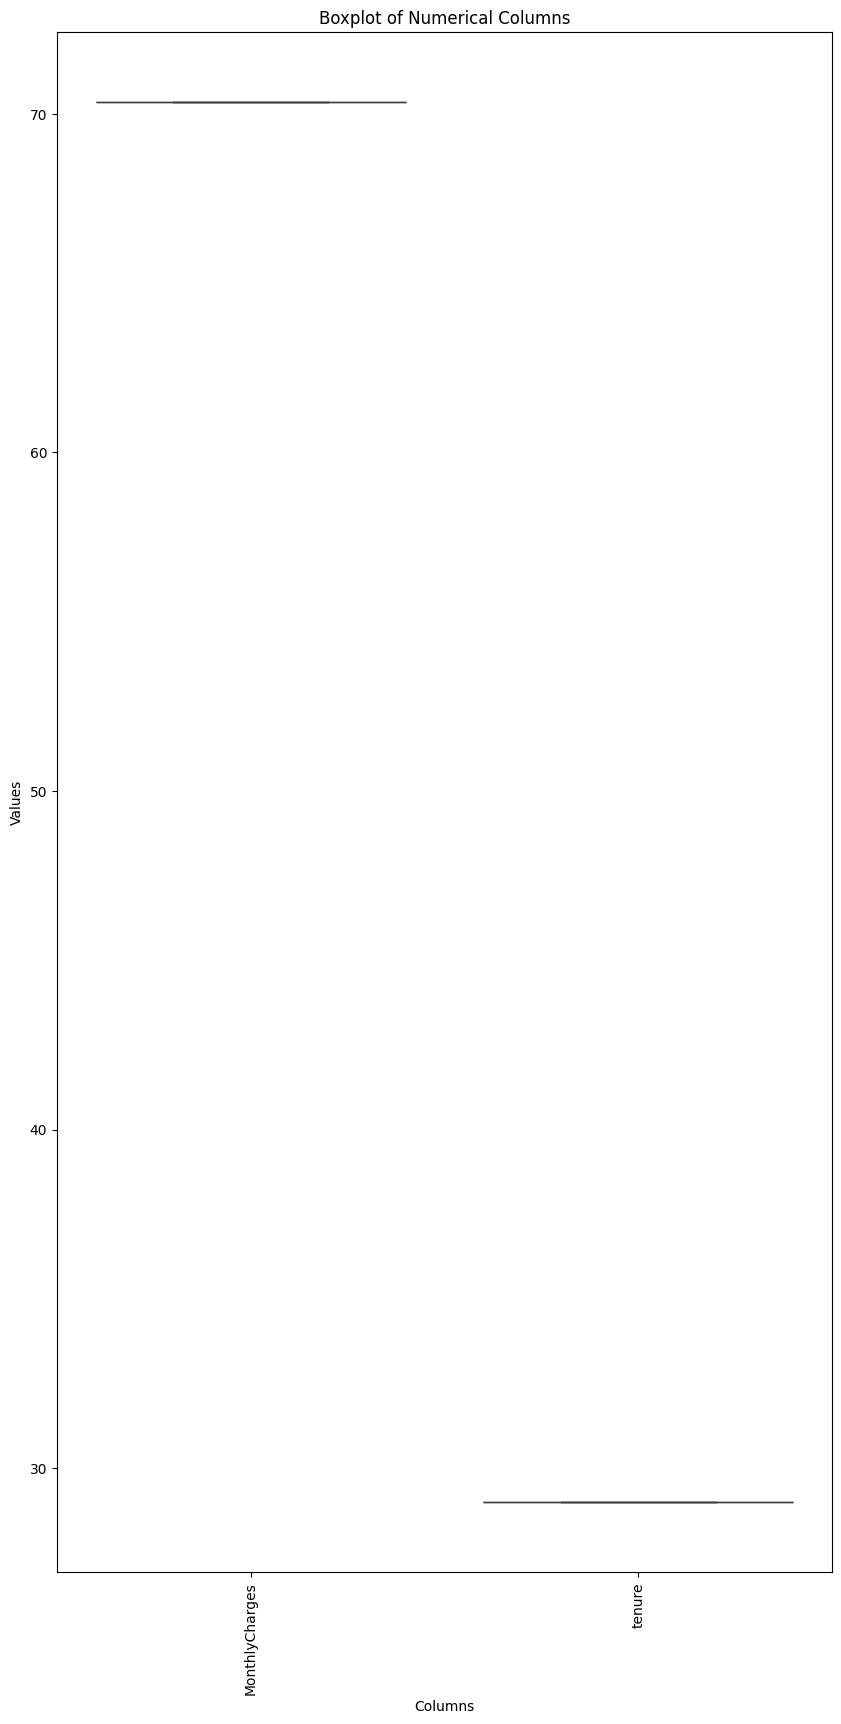

In [76]:
numerical_columns = ['MonthlyCharges','tenure']
plt.figure(figsize=(10,20))
sns.boxplot(data=data_encoded[numerical_columns])
plt.title('Boxplot of Numerical Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=90,fontsize=10)
plt.show()

In [77]:
#scaling


In [79]:
data_encoded.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_No internet service,...,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,gender_Male,Partner_Yes,Dependents_Yes,Churn_Yes
0,7590-VHVEG,0.0,29.0,70.35,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,5575-GNVDE,0.0,29.0,70.35,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3668-QPYBK,0.0,29.0,70.35,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,7795-CFOCW,0.0,29.0,70.35,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,9237-HQITU,0.0,29.0,70.35,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [83]:
data_encoded.describe()

,SeniorCitizen,tenure,MonthlyCharges,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,...,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,gender_Male,Partner_Yes,Dependents_Yes,Churn_Yes
count,7043.0,7043.0,7.043000e+03,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.0,29.0,7.035000e+01,0.903308,0.421269,0.442709,0.215533,0.285816,0.216243,0.343888,...,0.000142,0.000142,0.000142,0.000142,0.000142,0.000142,0.504756,0.483033,0.299588,0.265370
std,0.0,0.0,8.782932e-12,0.295559,0.493798,0.496742,0.411221,0.451834,0.411711,0.475038,...,0.011916,0.011916,0.011916,0.011916,0.011916,0.011916,0.500013,0.499748,0.458110,0.441561
min,0.0,29.0,7.035000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,29.0,7.035000e+01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,29.0,7.035000e+01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.0,29.0,7.035000e+01,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,0.0,29.0,7.035000e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [84]:
data_encoded.columns

Index(['customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges',
       'PhoneService_Yes', 'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service',
       ...
       'TotalCharges_997.65', 'TotalCharges_997.75', 'TotalCharges_998.1',
       'TotalCharges_999.45', 'TotalCharges_999.8', 'TotalCharges_999.9',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'Churn_Yes'],
      dtype='object', length=6550)

In [85]:
data_encoded.shape

(7043, 6550)

In [96]:
scaled_feats = ['tenure','MonthlyCharges']
X1 = data_encoded[scaled_feats]
X1.head()

,tenure,MonthlyCharges
0,29.0,70.35
1,29.0,70.35
2,29.0,70.35
3,29.0,70.35
4,29.0,70.35


In [97]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler(feature_range=(0,1))
X1 = mms.fit_transform(X1)
X1

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [98]:
#converting X1 BACK TO DATAFRAME
X1_df = pd.DataFrame(X1,columns=[scaled_feats])

In [100]:
#model

In [101]:
final_df = data_encoded.copy()

In [102]:
final_df.columns

Index(['customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges',
       'PhoneService_Yes', 'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service',
       ...
       'TotalCharges_997.65', 'TotalCharges_997.75', 'TotalCharges_998.1',
       'TotalCharges_999.45', 'TotalCharges_999.8', 'TotalCharges_999.9',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'Churn_Yes'],
      dtype='object', length=6550)

In [104]:
final_df['Churn'].value_counts()

KeyError: 'Churn'